In [187]:
from torchvision import models
import torchvision

In [188]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [189]:
alexnet = models.AlexNet()

In [190]:
resnet101 = models.resnet101(weights='ResNet101_Weights.DEFAULT')
resnet50 = models.resnet50(weights='ResNet50_Weights.DEFAULT')

# resnet101
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [191]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229,0.224,0.225]
    )
])

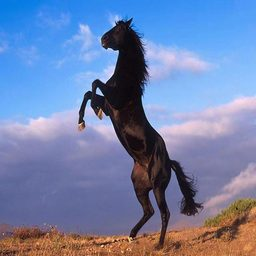

In [192]:
from PIL import Image
img = Image.open('../data/chapter_2/horse.jpg').convert('RGB')
img

In [193]:
img.getchannel

<bound method Image.getchannel of <PIL.Image.Image image mode=RGB size=256x256 at 0x7F29276CF400>>

In [194]:
img_t = preprocess(img)
img_t.size()

torch.Size([3, 224, 224])

In [195]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [196]:
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [197]:
out = resnet50(batch_t)
print(out.size())
print(out)

torch.Size([1, 1000])
tensor([[-4.0505e-01, -3.2452e-01, -3.7050e-01,  6.2976e-03, -5.5504e-01,
         -2.1537e-01, -1.0078e+00,  8.5415e-01, -4.0294e-01, -1.2468e-01,
         -1.7093e-01, -1.9999e-01, -1.3415e-01, -9.1617e-01, -6.6489e-01,
         -2.1112e-01, -3.4955e-01, -2.3831e-01, -6.8999e-01, -4.5725e-01,
         -7.7418e-01, -4.6317e-02, -6.9648e-01, -5.5732e-02, -7.6032e-01,
          1.0665e+00,  1.7550e+00,  7.9305e-01,  6.2832e-01,  1.2713e+00,
         -1.1389e-01, -2.0100e-01,  7.6378e-01, -6.7631e-01, -8.1170e-02,
         -2.7786e-02, -6.6205e-02,  9.1648e-02,  1.6825e+00,  2.5911e+00,
          8.8070e-01,  1.8296e+00,  1.7508e+00,  3.2945e+00,  1.6945e+00,
          6.9638e-01,  3.7208e-01,  1.3411e+00,  9.6931e-01,  1.0748e-01,
          8.5302e-01,  1.2311e+00, -1.0614e+00, -5.3783e-01, -7.0933e-01,
         -7.1880e-01, -8.0317e-01, -4.6239e-01, -5.4943e-01, -2.8664e-02,
         -5.8107e-01, -4.2628e-01,  5.1888e-02, -1.9900e-01, -9.4050e-02,
         -5.7215

In [198]:
with open('../data/chapter_2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
# labels

In [199]:
_, index = torch.max(out, 1)
index

tensor([176])

In [200]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
percentage_max = torch.max(percentage, 0)
print(percentage_max)
print(percentage)


torch.return_types.max(
values=tensor(21.2983, grad_fn=<MaxBackward0>),
indices=tensor(176))
tensor([2.9257e-02, 3.1710e-02, 3.0285e-02, 4.4144e-02, 2.5181e-02, 3.5367e-02,
        1.6012e-02, 1.0306e-01, 2.9318e-02, 3.8724e-02, 3.6974e-02, 3.5915e-02,
        3.8359e-02, 1.7549e-02, 2.2562e-02, 3.5518e-02, 3.0926e-02, 3.4565e-02,
        2.2003e-02, 2.7769e-02, 2.0226e-02, 4.1881e-02, 2.1860e-02, 4.1489e-02,
        2.0508e-02, 1.2744e-01, 2.5370e-01, 9.6950e-02, 8.2226e-02, 1.5641e-01,
        3.9145e-02, 3.5879e-02, 9.4153e-02, 2.2306e-02, 4.0446e-02, 4.2664e-02,
        4.1056e-02, 4.8077e-02, 2.3595e-01, 5.8538e-01, 1.0583e-01, 2.7335e-01,
        2.5262e-01, 1.1828e+00, 2.3882e-01, 8.8017e-02, 6.3639e-02, 1.6771e-01,
        1.1564e-01, 4.8844e-02, 1.0294e-01, 1.5024e-01, 1.5176e-02, 2.5619e-02,
        2.1581e-02, 2.1378e-02, 1.9648e-02, 2.7626e-02, 2.5323e-02, 4.2627e-02,
        2.4535e-02, 2.8642e-02, 4.6203e-02, 3.5951e-02, 3.9929e-02, 4.1427e-02,
        2.5325e-02, 2.7490e

In [201]:
print(labels[index[0]].split(',')[1], percentage[index[0]].item())


 whippet 21.298261642456055


In [202]:
_, indices = torch.sort(out, descending=True)
[(labels[idx].split(',')[1], percentage[idx].item()) for idx in indices[0][:5]]

[(' whippet', 21.298261642456055),
 (' German_short-haired_pointer', 9.273064613342285),
 (' Chesapeake_Bay_retriever', 3.1576759815216064),
 (' parking_meter', 2.478534460067749),
 (' armadillo', 1.6512997150421143)]

### 2.2.3 A Network that turns horses into zebras

The dataset link horese2zebra 👉
1. https://efrosgans.eecs.berkeley.edu/cyclegan/datasets/
2. https://www.kaggle.com/datasets/balraj98/horse2zebra-dataset

In [203]:
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [204]:
netG = ResNetGenerator()

In [205]:
model_path = '../data/chapter_2/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [206]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [207]:
preprocess = transforms.Compose([transforms.Resize(256), transforms.ToTensor()])
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [208]:

batch_out = netG(batch_t)

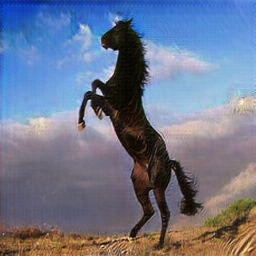

In [209]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img

### 2.4 TorchHub

In [210]:
from torch import hub

In [215]:
resnet18_model = hub.load('pytorch/vision:main', 'resnet18')

Using cache found in /home/usman/.cache/torch/hub/pytorch_vision_main


##### To test the model from other repo which has the hubconf.py 

In [218]:
# https://github.com/ultralytics/yolov5/blob/master/hubconf.py
# yolov5n(pretrained=True, channels=3, classes=80, autoshape=True, _verbose=True, device=None)

yolo5_model = hub.load('ultralytics/yolov5:master', 'yolov5n')


Using cache found in /home/usman/.cache/torch/hub/ultralytics_yolov5_master


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 31.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 38.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 34.6 MB/s eta 0:00:00
requ

YOLOv5 🚀 2023-12-31 Python-3.10.0 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5930MiB)

100.0%

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [219]:
yolo5_model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

In [222]:
batch_out = yolo5_model(batch_t)
batch_out

tensor([[[1.77452e+00, 3.14663e+00, 7.93786e+00,  ..., 3.45811e-04, 4.74660e-04, 1.41575e-03],
         [1.14267e+01, 1.84005e+00, 1.87713e+01,  ..., 3.55473e-04, 5.73810e-04, 1.75708e-03],
         [1.96592e+01, 1.55179e+00, 2.05652e+01,  ..., 4.96112e-04, 9.01074e-04, 4.79323e-03],
         ...,
         [1.81149e+02, 2.21690e+02, 1.44644e+02,  ..., 9.06259e-04, 5.33656e-04, 7.35490e-04],
         [2.01786e+02, 2.24505e+02, 1.24326e+02,  ..., 9.89999e-04, 5.80306e-04, 7.76719e-04],
         [2.34444e+02, 2.27790e+02, 1.54842e+02,  ..., 8.73193e-04, 6.51100e-04, 1.03818e-03]]], device='cuda:0')